In [1]:
#pip install pydicom

In [22]:
import sys
import os 
import matplotlib.pyplot as plt
import cv2

utils_path = os.path.join(os.getcwd(), 'Histogram_Thresholding', 'Helpers')
HistThresh_path = os.path.join(os.getcwd(), 'Histogram_Thresholding')
sys.path.append(utils_path)
sys.path.append(HistThresh_path)

import DicomReader
import Smoothing
import Otsu_Thresh
import Connected_Comp_Anal

# Load Image and Plot

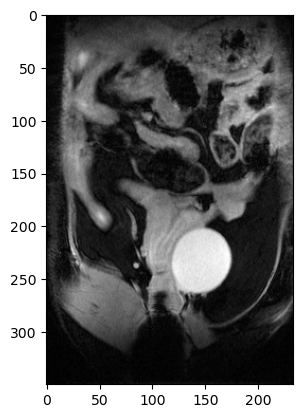

In [ ]:
#Get image Path
ImgPath = "C:/Users/aorr3/VScode/20250421_153327_AWJ24CZBIOHUB_1_AWJ24CZBIOHUB_24_1_24/20250421_153327_AWJ24CZBIOHUB_1_AWJ24CZBIOHUB_24_1_24/3/pdata/2/dicom/AWJ24CZBIOHUB_1_AWJ24CZBIOHUB_1_AWJ24CZBIOHUB_24_E3_P2_EnIm1.dcm"
ImgPath2 = "C:/Users/aorr3/VScode/20250310_141009_AWJ24CZBIOHUB_1_AWJ24CZBIOHUB_11_1_11/20250310_141009_AWJ24CZBIOHUB_1_AWJ24CZBIOHUB_11_1_11/6/pdata/1/dicom/AWJ24CZBIOHUB_1_AWJ24CZBIOHUB_1_AWJ24CZBIOHUB_11_E6_P1_EnIm1.dcm"

#Read in file using ReadDicom method (stack, rows, columns)
Images=DicomReader.ReadDicom(ImgPath)
Images2=DicomReader.ReadDicom(ImgPath2)


#grab the 17th image in April 21 data as seed image 1
seed_image = Images[16,:,:]

#grab the 13th image in March 10 data as seed image 2
seed_image2 = Images2[12,:,:]

#Need to normalize images from 0 to 255 for proper thresholding
seed_image_normal = cv2.normalize(seed_image,None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX).astype('uint8')
seed_image_normal2= cv2.normalize(seed_image2,None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX).astype('uint8')

#plot 
plt.figure()
plt.imshow(seed_image2, cmap = 'gray')


# Smooth Image with Guassian filter

Text(0.5, 1.0, 'Smoothed Image')

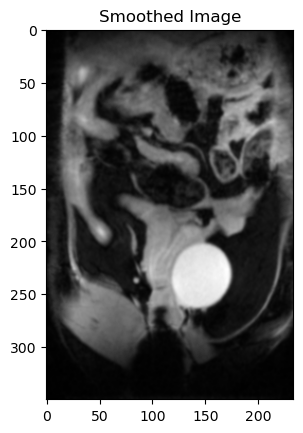

In [36]:
# Perform smoothing
seedImg_smooth = Smoothing.GuassFilter(seed_image_normal2, 5, 1)

#visulalize results
plt.figure()
plt.imshow(seedImg_smooth, cmap = 'gray')
plt.title("Smoothed Image")


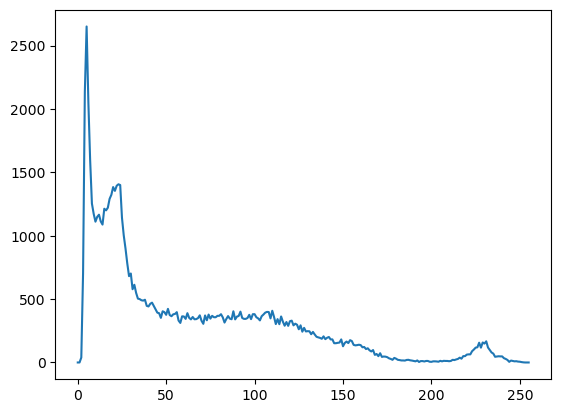

In [ ]:
#For debugging. Check histogram vals to see the distribution of pixels

#convert to CV_8U format
img_8U = cv2.convertScaleAbs(seedImg_smooth)

hist = cv2.calcHist([img_8U], [0], None, [256], [0, 256])
plt.plot(hist)


# Perform Otsu Thresholding

76.0


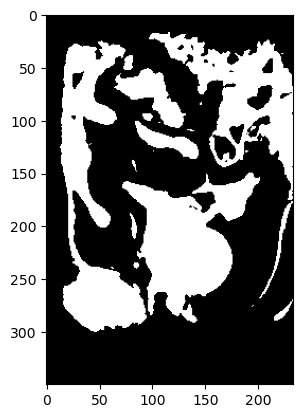

In [43]:
#Perform the thresholding
OtsuVal, Otsuthresh = Otsu_Thresh.Otsu(seedImg_smooth, 50)
print(OtsuVal)

plt.figure()
plt.imshow(Otsuthresh, cmap = 'gray')

# Connected Component Analysis